In [1]:
from drivecycle import drivecycle, trajectory
from drivecycle.utils import utils, plots
import matplotlib.pyplot as plt
import networkx as nx

import requests
import polyline
import json
import pandas as pd
import numpy as np

import pickle

from sklearn.neighbors import KernelDensity
from matplotlib.pyplot import plot

In [2]:
infile = open("edges",'rb')
edges = pickle.load(infile)
infile.close()

In [3]:
edges

[{'end_node': {'type': 'street_intersection',
   'elapsed_time': 0.698,
   'intersecting_edges': [{'road_class': 'service_other',
     'begin_heading': 204,
     'to_edge_name_consistency': False,
     'from_edge_name_consistency': False}]},
  'length': 0.007,
  'names': ['48 Avenue NW'],
  'speed': 35,
  'way_id': 463682703},
 {'end_node': {'type': 'street_intersection',
   'elapsed_time': 7.607,
   'intersecting_edges': [{'road_class': 'residential',
     'begin_heading': 131,
     'to_edge_name_consistency': False,
     'from_edge_name_consistency': False}]},
  'length': 0.067,
  'names': ['48 Avenue NW'],
  'speed': 35,
  'way_id': 463682703},
 {'end_node': {'type': 'street_intersection',
   'elapsed_time': 23.67,
   'intersecting_edges': [{'road_class': 'residential',
     'begin_heading': 177,
     'to_edge_name_consistency': False,
     'from_edge_name_consistency': False},
    {'road_class': 'residential',
     'begin_heading': 0,
     'to_edge_name_consistency': False,
     'f

In [21]:
data_ = []
x = 0.0
for edge in edges:
    length = edge["length"]*1000
    speed = edge["speed"]
    way_id = edge["way_id"]
    
    try:
        intersecting_edge_class = list(set([i["road_class"] for i in edge["end_node"]["intersecting_edges"]]))
    except KeyError:
        intersecting_edge_class = None
        
    try:
        name = edge["names"]
    except:
        name = [None]

    item = {
        "way_id":[way_id],
        "length":length,
        "name":name,
        "speed":speed,
        "intersecting_edge_class":intersecting_edge_class,
        "LR": x+length
    }
    data_.append(item)
    x=item["LR"]

In [22]:
data_

[{'way_id': [463682703],
  'length': 7.0,
  'name': ['48 Avenue NW'],
  'speed': 35,
  'intersecting_edge_class': ['service_other'],
  'LR': 7.0},
 {'way_id': [463682703],
  'length': 67.0,
  'name': ['48 Avenue NW'],
  'speed': 35,
  'intersecting_edge_class': ['residential'],
  'LR': 74.0},
 {'way_id': [463682703],
  'length': 156.0,
  'name': ['48 Avenue NW'],
  'speed': 35,
  'intersecting_edge_class': ['residential'],
  'LR': 230.0},
 {'way_id': [463682702],
  'length': 44.0,
  'name': ['48 Avenue NW'],
  'speed': 35,
  'intersecting_edge_class': ['residential'],
  'LR': 274.0},
 {'way_id': [139293935],
  'length': 130.0,
  'name': ['48 Avenue NW'],
  'speed': 35,
  'intersecting_edge_class': ['residential'],
  'LR': 404.0},
 {'way_id': [139293935],
  'length': 144.0,
  'name': ['48 Avenue NW'],
  'speed': 30,
  'intersecting_edge_class': ['service_other'],
  'LR': 548.0},
 {'way_id': [139293935],
  'length': 16.0,
  'name': ['48 Avenue NW'],
  'speed': 30,
  'intersecting_edge_cl

In [18]:
len(data_)

347

In [19]:
onestop_id = "r-c3nf-1-702631-be6946"
api_key = "SN0N9PZyDIDrOf9tcm3DS1t8sbqZi1Ul"

url = f"http://transit.land/api/v1/route_stop_patterns.geojson?onestop_id={onestop_id}&api_key={api_key}"

print(url)

r = requests.get(url).json()

stops = r["features"][0]["properties"]["stop_distances"]
coords = [tuple((i[1],i[0])) for i in r["features"][0]["geometry"]["coordinates"]]

b = polyline.encode(coords, 6)

url_trace = "http://localhost:8002/trace_attributes" 
data =json.dumps({"encoded_polyline":b,"costing":"auto","filters":{"attributes":["edge.way_id","edge.names","edge.length","edge.speed","node.intersecting_edge.road_class","node.intersecting_edge.begin_heading","node.elapsed_time","node.type"],"action":"include"}})

trace = requests.post(url_trace, data=data)
edges = trace.json()["edges"]

stops = [i for i in stops if i!=0]

http://transit.land/api/v1/route_stop_patterns.geojson?onestop_id=r-c3nf-1-702631-be6946&api_key=SN0N9PZyDIDrOf9tcm3DS1t8sbqZi1Ul


In [20]:
stops

[277.9,
 623.9,
 816.3,
 1082.6,
 1319.5,
 1513.4,
 1814.0,
 1993.3,
 2179.3,
 2385.9,
 2593.2,
 2933.7,
 3235.6,
 3442.4,
 3778.7,
 3999.3,
 4352.7,
 4706.9,
 5190.7,
 5487.7,
 5671.1,
 6010.5,
 6174.0,
 6383.1,
 7226.8,
 7482.8,
 7674.9,
 8021.8,
 8276.2,
 8650.2,
 8945.2,
 9363.1,
 9557.9,
 9882.3,
 10233.9,
 10577.2,
 10937.0,
 11170.1,
 11464.7,
 11688.2,
 12250.4,
 12518.0,
 12955.8,
 13369.1,
 13668.6,
 14114.8,
 14466.4,
 15076.6,
 15633.9,
 15783.7,
 15987.6,
 16176.6,
 16392.3,
 16624.6,
 16961.8,
 17219.0,
 19220.8,
 19807.9,
 20162.4,
 20969.7,
 21809.8,
 22118.7,
 22397.6,
 22613.3,
 23062.1,
 23342.8,
 23522.3,
 23784.6,
 24051.8,
 24355.4]

In [23]:
filters = ["secondary","primary"]
reduced = [i for i in data_ if i["intersecting_edge_class"] is not None and any(x in i["intersecting_edge_class"] for x in filters)]

reduced

[{'way_id': [479262116],
  'length': 135.0,
  'name': ['Bowness Road NW'],
  'speed': 50,
  'intersecting_edge_class': ['primary'],
  'LR': 6563.0},
 {'way_id': [4704980],
  'length': 56.0,
  'name': ['Bowness Road NW'],
  'speed': 50,
  'intersecting_edge_class': ['primary'],
  'LR': 6619.0},
 {'way_id': [467681864],
  'length': 112.0,
  'name': ['Bowness Road NW'],
  'speed': 60,
  'intersecting_edge_class': ['primary'],
  'LR': 6768.0},
 {'way_id': [209246590],
  'length': 80.0,
  'name': ['Bowness Road NW'],
  'speed': 60,
  'intersecting_edge_class': ['primary'],
  'LR': 6848.0},
 {'way_id': [461113687],
  'length': 62.0,
  'name': ['Bowness Road NW'],
  'speed': 60,
  'intersecting_edge_class': ['primary'],
  'LR': 6910.0},
 {'way_id': [461113689],
  'length': 6.0,
  'name': ['Bowness Road NW'],
  'speed': 60,
  'intersecting_edge_class': ['primary', 'service_other'],
  'LR': 6934.0},
 {'way_id': [461113686],
  'length': 11.0,
  'name': ['Bowness Road NW'],
  'speed': 60,
  'inte

In [24]:
reduced

[{'way_id': [479262116],
  'length': 135.0,
  'name': ['Bowness Road NW'],
  'speed': 50,
  'intersecting_edge_class': ['primary'],
  'LR': 6563.0},
 {'way_id': [4704980],
  'length': 56.0,
  'name': ['Bowness Road NW'],
  'speed': 50,
  'intersecting_edge_class': ['primary'],
  'LR': 6619.0},
 {'way_id': [467681864],
  'length': 112.0,
  'name': ['Bowness Road NW'],
  'speed': 60,
  'intersecting_edge_class': ['primary'],
  'LR': 6768.0},
 {'way_id': [209246590],
  'length': 80.0,
  'name': ['Bowness Road NW'],
  'speed': 60,
  'intersecting_edge_class': ['primary'],
  'LR': 6848.0},
 {'way_id': [461113687],
  'length': 62.0,
  'name': ['Bowness Road NW'],
  'speed': 60,
  'intersecting_edge_class': ['primary'],
  'LR': 6910.0},
 {'way_id': [461113689],
  'length': 6.0,
  'name': ['Bowness Road NW'],
  'speed': 60,
  'intersecting_edge_class': ['primary', 'service_other'],
  'LR': 6934.0},
 {'way_id': [461113686],
  'length': 11.0,
  'name': ['Bowness Road NW'],
  'speed': 60,
  'inte

In [61]:
a = np.array([i["LR"] for i in reduced])
a = a/1000

In [64]:
a = np.array(a).reshape(-1,1)
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(a)

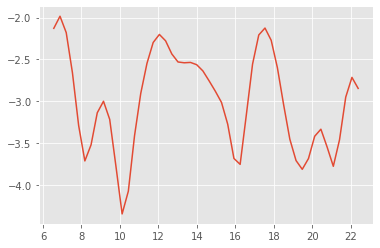

In [65]:
s = np.linspace(a.min(),a.max())
e = kde.score_samples(s.reshape(-1,1))
plot(s, e)

In [66]:
from scipy.signal import argrelextrema

In [67]:
mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]

In [68]:
s[mi]

array([ 8.17820408, 10.11644898, 13.34685714, 16.25422449, 19.48463265,
       21.09983673])

In [69]:
s[ma]

array([ 6.88604082,  9.14732653, 12.05469388, 13.66989796, 17.54638776,
       20.4537551 , 22.06895918])

In [47]:
reduced

[{'way_id': [479262116],
  'length': 0.135,
  'name': ['Bowness Road NW'],
  'speed': 50,
  'intersecting_edge_class': ['primary'],
  'LR': 6.5630000000000015},
 {'way_id': [4704980],
  'length': 0.056,
  'name': ['Bowness Road NW'],
  'speed': 50,
  'intersecting_edge_class': ['primary'],
  'LR': 6.6190000000000015},
 {'way_id': [467681864],
  'length': 0.112,
  'name': ['Bowness Road NW'],
  'speed': 60,
  'intersecting_edge_class': ['primary'],
  'LR': 6.768000000000002},
 {'way_id': [209246590],
  'length': 0.08,
  'name': ['Bowness Road NW'],
  'speed': 60,
  'intersecting_edge_class': ['primary'],
  'LR': 6.848000000000002},
 {'way_id': [461113687],
  'length': 0.062,
  'name': ['Bowness Road NW'],
  'speed': 60,
  'intersecting_edge_class': ['primary'],
  'LR': 6.910000000000002},
 {'way_id': [461113689],
  'length': 0.006,
  'name': ['Bowness Road NW'],
  'speed': 60,
  'intersecting_edge_class': ['service_other', 'primary'],
  'LR': 6.934000000000002},
 {'way_id': [461113686],

In [85]:
def modify(l):
    last = l[0]
    for e in l:
        if e["speed"] != last["speed"]:
            yield e

        last = e

pure = modify([0, 0, 1, 3, 2, 2, 3, 3])

In [86]:
# list(pure)

In [87]:
list(modify(data_))

[{'way_id': [139293935],
  'length': 144.0,
  'name': ['48 Avenue NW'],
  'speed': 30,
  'intersecting_edge_class': ['service_other'],
  'LR': 548.0},
 {'way_id': [199138512],
  'length': 48.0,
  'name': ['85 Street NW'],
  'speed': 40,
  'intersecting_edge_class': ['service_other'],
  'LR': 625.0},
 {'way_id': [54621698],
  'length': 58.0,
  'name': ['Bowness Road NW'],
  'speed': 50,
  'intersecting_edge_class': None,
  'LR': 1079.0},
 {'way_id': [204198814],
  'length': 198.0,
  'name': ['Bowness Road NW'],
  'speed': 40,
  'intersecting_edge_class': ['residential'],
  'LR': 2344.0},
 {'way_id': [204198814],
  'length': 116.0,
  'name': ['Bowness Road NW'],
  'speed': 50,
  'intersecting_edge_class': ['residential'],
  'LR': 2460.0},
 {'way_id': [172639661],
  'length': 59.0,
  'name': ['Bowness Road NW'],
  'speed': 40,
  'intersecting_edge_class': ['residential'],
  'LR': 2904.0},
 {'way_id': [196555672],
  'length': 15.0,
  'name': ['Bowness Road NW'],
  'speed': 50,
  'intersect

In [84]:
data_

[{'way_id': [463682703],
  'length': 7.0,
  'name': ['48 Avenue NW'],
  'speed': 35,
  'intersecting_edge_class': ['service_other'],
  'LR': 7.0},
 {'way_id': [463682703],
  'length': 67.0,
  'name': ['48 Avenue NW'],
  'speed': 35,
  'intersecting_edge_class': ['residential'],
  'LR': 74.0},
 {'way_id': [463682703],
  'length': 156.0,
  'name': ['48 Avenue NW'],
  'speed': 35,
  'intersecting_edge_class': ['residential'],
  'LR': 230.0},
 {'way_id': [463682702],
  'length': 44.0,
  'name': ['48 Avenue NW'],
  'speed': 35,
  'intersecting_edge_class': ['residential'],
  'LR': 274.0},
 {'way_id': [139293935],
  'length': 130.0,
  'name': ['48 Avenue NW'],
  'speed': 35,
  'intersecting_edge_class': ['residential'],
  'LR': 404.0},
 {'way_id': [139293935],
  'length': 144.0,
  'name': ['48 Avenue NW'],
  'speed': 30,
  'intersecting_edge_class': ['service_other'],
  'LR': 548.0},
 {'way_id': [139293935],
  'length': 16.0,
  'name': ['48 Avenue NW'],
  'speed': 30,
  'intersecting_edge_cl

In [ ]:
G = nx.path_graph(len(reduced) + 1)
keys = list(reduced[0].keys())

for i, (u, v) in enumerate(G.edges):
    for key in keys:
        if key in reduced[i]:
            G[u][v][key] = reduced[i][key]

In [ ]:
H = G.copy()

for u, v, d in G.edges.data():
    n = list(H.neighbors(u))
    if len(n)==2:
        e1 = H[u][n[0]]
        e2 = H[u][n[1]]
        
        LR1 = e1["LR"]
        LR2 = e2["LR"]
        
        e1_speed = e1["speed"]
        e2_speed = e2["speed"]

        e1_way_id = e1["way_id"]
        e2_way_id = e2["way_id"]

        diff = LR2-LR1
        
        if diff<=0.05:
            LR = (LR1+LR2)/2
            speed = (e1_speed+e2_speed)/2
            
            way_ids = e1_way_id + e2_way_id
            names = e1["name"]+e2["name"]
            intersection = e1["intersecting_edge_class"]+e2["intersecting_edge_class"]
            
            H.add_edge(n[0],
                n[1],
                way_id=way_ids,
                speed=speed,
                LR=LR,
                intersecting_edge_class=intersection,
                name=names)
            H.remove_node(u)

In [ ]:
for u, v, d in H.edges.data():
    print(H[u])

In [ ]:
edges = []
for path in sorted(nx.all_simple_edge_paths(H, 0, 46)):
    for i in path:
        edges.append(G[i[0]][i[1]])

In [ ]:
i = 0 
for edge in edges:
    i+=edge["length"]
#     try:
#         a = edge["end_node"]
#     except:
#         i+=1
#         print(edge)
print(i)

In [ ]:
a = utils.Graph(data_)

In [ ]:
b = a.simplify_graph()

In [ ]:
c = a.get_source_target()
simple_edges = utils.get_edges(b,c)

In [ ]:
len(simple_edges)

In [ ]:
simple_edges

In [ ]:
[i["length"] for i in simple_edges]

In [ ]:
i = 0 
for edge in edges:
    i+=edge["length"]
#     try:
#         a = edge["end_node"]
#     except:
#         i+=1
#         print(edge)
print(i)

In [ ]:
# G = nx.path_graph(len(edges) + 1)

# x = 0
# for i, (u, v) in enumerate(G.edges):
#     for key in keys:
#         if key in edges[i]:
#             G[u][v][key] = edges[i][key]
#     G[u][v]["LR"] = x+edges[i]["length"]
#     x = G[u][v]["LR"]
    

In [ ]:
# data_ = []
# for edge in edges:
#     length = edge["length"]*1000
#     speed = edge["speed"]
#     way_id = edge["way_id"]
#     try:
#         intersect = [edge["end_node"]["intersecting_edges"][0]["road_class"]]
#     except:
#         intersect = [None]

#     item = {
#         "way_id":way_id,
#         "length":length,
#         "speed":speed,
#         "intersection":intersect,
#     }
#     data_.append(item)